In [2]:
import numpy as np
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

from random import seed
from random import randrange

In [3]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)

X = data.values[:,2:-1].astype('float64')
X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)
X = np.hstack([np.ones((X.shape[0], 1)),X]) 
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

In [4]:
selected_features = data[['radius_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'concave points_se',
'concavity_se', 'compactness_se', 'radius_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']]

X_train, X_test, Y_train, Y_test = train_test_split(selected_features, Y, test_size=0.25, random_state=0)
print(X_train.shape)

(426, 13)


In [5]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
def Hypothesis(theta, x):   
    return Sigmoid(x @ theta)

In [7]:
def Cost_Function(X,Y,theta,m):
    hi = Hypothesis(theta, x)
    _y = Y.reshape(-1, 1)
    J = 1/float(m) * np.sum(-_y * np.log(hi) - (1-_y) * np.log(1-hi))
    return J

In [8]:
def Cost_Function_Derivative(X,Y,theta,m,alpha):
    hi = Hypothesis(theta,X)
    _y = Y.reshape(-1, 1)
    J = alpha/float(m) * X.T @ (hi - _y)
    return J

def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = theta - Cost_Function_Derivative(X,Y,theta,m,alpha)
    return new_theta

LR Accuracy:  88.1118881119 %
Accuracy score 88.111888 %
Confusion Matrix: 
 [[80 10]
 [ 7 46]]


LR Report:
             precision    recall  f1-score   support

     Benign       0.92      0.89      0.90        90
  Malignant       0.82      0.87      0.84        53

avg / total       0.88      0.88      0.88       143



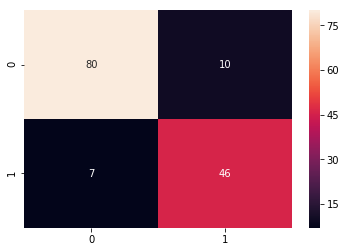

In [21]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy: ', my_accuracy, "%")
    print("Accuracy score %f" % (accuracy_score(Y_test, prediction)*100),"%")

    #Confusion Matrix and F1 scoring
    cm= confusion_matrix(Y_test, prediction)
    print("Confusion Matrix:", "\n", cm)
    sns.heatmap(cm,annot=True,fmt="d")
    print('\n')
    print("LR Report:")
    target_names = ['Benign', 'Malignant']
    print(classification_report(Y_test, prediction, target_names=target_names))


def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    Accuracy(theta)


ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.9
iterations = 100000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)